In [1]:
import rishi_utils as ru
from rdkit import Chem
import fall20_mse_8803 as retro
import importlib
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
importlib.reload(retro)
importlib.reload(ru)
import numpy as np
import pickle

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz
Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz


In [ ]:
Chem.MolFromSmiles('Cc1sc2c(-c3sc(-c4cc5c(s4)-c4sc(-c6sc(-c7sc(-c8scc9c8OCCO9)c8sc(C)c(F)c78)c7c6OCCO7)cc4C5(C)C)c4c3OCCO4)scc2c1F')

# Test is_symmetric2

In [ ]:
Chem.Atom.GetProp

In [ ]:
m.GetAtoms()[0].GetPropsAsDict()

In [ ]:
m.GetAtoms()[0].GetProp('_GasteigerCharge')

In [ ]:
m = Chem.MolFromSmiles('C1=C(C=CC2=C1C3C2CCC4C(CC3)CC5C(C4)C=CC(=C5)Br)Br')
m

In [ ]:
retro.is_symmetric2(m,'Br')

In [ ]:
retro.is_symmetric2('C=C','C')

In [ ]:
m2 = Chem.MolFromSmiles('C(C(CCCC1=CC=CC(=C1)Br)C)C2=CC(=CC=C2)Br')
m2

In [ ]:
retro.is_symmetric2(m2,'Br')

In [ ]:
retro.is_symmetric2(m2,'Br')

# ox_depolymerize scratch

In [ ]:
mol = Chem.MolFromSmiles('*c1ccc(*)cc1')
mol

In [ ]:
mol.GetAtoms()[2].GetBonds()[0].GetBondTypeAsDouble()

In [ ]:
lp = ru.LinearPol(mol)
if retro.is_symmetric2(lp.mol,'*'):
    bonds = lp.mol.GetAtoms()[max(lp.connector_inds)].GetBonds()
    bond_types = np.array([b.GetBondTypeAsDouble() for b in bonds])
    if any(bond_types > 1):
        em = Chem.EditableMol(lp.mol)
        em.RemoveAtom(max(lp.star_inds))
        em.RemoveAtom(min(lp.star_inds))
        try:
            new_mol = em.GetMol()
            Chem.SanitizeMol(new_mol)
            #return new_mol
        except:
            print(None)
            #return None
    else:
        print(None)
        #return None
else:
    print(None)
    #return None

In [ ]:
Chem.SanitizeMol(new_mol)

In [ ]:
mol.GetBonds()[6].GetBondTypeAsDouble()

In [ ]:
mol.GetBonds()[6].GetBondType()

# Test ox_depolymerize

In [ ]:
mol = Chem.MolFromSmiles('*c1ccc(*)cc1')
mol

In [ ]:
retro.ox_depolymerize(mol)

In [ ]:
mol = Chem.MolFromSmiles('*C1CCC(*)CC1')
mol

In [ ]:
retro.ox_depolymerize(mol) #should return nothing. No double bonds

In [ ]:
mol3 = Chem.MolFromSmiles('*Cc1ccc(*)cc1')
mol3

In [ ]:
retro.ox_depolymerize(mol3) #should return nothing. Not symmetric

In [ ]:
mol4 = Chem.MolFromSmiles('*Cc1ccc(C*)cc1')
mol4

In [ ]:
retro.ox_depolymerize(mol4) #should return nothing. Connector atoms do not have pi electrons

In [ ]:
mol5 = Chem.MolFromSmiles('*c1ccc(*)[nH]1')
mol5

In [ ]:
retro.ox_depolymerize(mol5) #should return something

In [ ]:
mol6 = Chem.MolFromSmiles('*c1[nH]c(*)c2OCCCOc12')
mol6

In [ ]:
retro.ox_depolymerize(mol6) #shoudld return something

# Look thru G2G success polymers

In [ ]:
success = ru.pd_load('/data/rgur/g2g/paper_1/cib_tg_eg/cutoff-.1/first_cib_model/new_polymers_12_43PM_on_June_23_2020_sortedObjective.csv')
success.head()

len(success)

smiles_ls = success['SMILES'].tolist()
inds = [x for x in smiles_ls if retro.ox_depolymerize(x) != None]
inds

len(inds)

# Look thru relaxed G2G polymers 

In [ ]:
df = ru.pd_load('/data/rgur/g2g/paper_1/cib_tg_eg/cutoff-.1/first_cib_model/results_List/uniqueCanPolyAndProps.csv')
df.head()

df_med = df[(df['bg']>5.5)&(df['cib']>2.5)&(df['tg']>400)].drop_duplicates()
smiles_ls = df_med['smiles'].tolist()

In [ ]:
smiles_ls[0:5]

In [ ]:
inds = [x for x in smiles_ls if retro.ox_depolymerize(x) != None]
inds

len(inds)

In [ ]:
Chem.MolFromSmiles(inds[0])

In [ ]:
retro.ox_depolymerize(inds[0])

# Check symmetry

In [ ]:
inds = []
for x in smiles_ls:
    lp = ru.LinearPol(x)
    if len(set(lp.connector_inds)) == 2:
        m=lp.delStarMol()
        if retro.is_symmetric2(m,group=lp.delStarMolInds):
            inds += [x]

In [ ]:
len(inds)

In [ ]:
Chem.MolFromSmiles(inds[0])

In [ ]:
Chem.MolFromSmiles(inds[1])

In [ ]:
Chem.MolFromSmiles(inds[2])

In [ ]:
Chem.MolFromSmiles(inds[3])

In [ ]:
Chem.MolFromSmiles(inds[4])

In [ ]:
Chem.MolFromSmiles(inds[5])

In [ ]:
Chem.MolFromSmiles(inds[6])

In [ ]:
Chem.MolFromSmiles(inds[7])

In [ ]:
Chem.MolFromSmiles(inds[8])

In [ ]:
Chem.MolFromSmiles(inds[9])

In [ ]:
Chem.MolFromSmiles(inds[10])

In [ ]:
Chem.MolFromSmiles(inds[11])

In [ ]:
Chem.MolFromSmiles(inds[12])

In [ ]:
Chem.MolFromSmiles(inds[13])

In [ ]:
Chem.MolFromSmiles(inds[14])

In [ ]:
Chem.MolFromSmiles(inds[15])

In [ ]:
Chem.MolFromSmiles(inds[16])

In [ ]:
Chem.MolFromSmiles(inds[17])

In [ ]:
Chem.MolFromSmiles(inds[18])

In [ ]:
Chem.MolFromSmiles(inds[19])

In [ ]:
Chem.MolFromSmiles(inds[20])

In [ ]:
Chem.MolFromSmiles(inds[21])

In [ ]:
Chem.MolFromSmiles(inds[22])

In [ ]:
Chem.MolFromSmiles(inds[23])

In [ ]:
Chem.MolFromSmiles(inds[24])

In [ ]:
Chem.MolFromSmiles(inds[25])

In [ ]:
Chem.MolFromSmiles(inds[26])

In [ ]:
Chem.MolFromSmiles(inds[27])

In [ ]:
Chem.MolFromSmiles(inds[28])

In [ ]:
Chem.MolFromSmiles(inds[29])

In [ ]:
Chem.MolFromSmiles(inds[40])

In [ ]:
Chem.MolFromSmiles(inds[47])

In [ ]:
Chem.MolFromSmiles(inds[50])

# Look for resonance

In [ ]:
mol = Chem.MolFromSmiles('Oc1[c][c-]c(O)cc1')
mol

In [ ]:
Chem.AddHs(mol)

In [ ]:
a=Chem.ResonanceMolSupplier(mol)

In [ ]:
Chem.AddHs(a[0])

In [ ]:
Chem.AddHs(a[1])

In [ ]:
Chem.AddHs(a[2])

# Create function for drawing depolymerizations

In [ ]:
p_mol = '*CC*'#polymer mol
dp_func = retro.frp_depolymerize #depolymerization function
if type(p_mol) == str:
    p_mol = Chem.MolFromSmiles('*CC*')
monomer = dp_func(p_mol)
label_dict = {
    retro.frp_depolymerize: 'Radical/Ionic Polymerization'
}
Chem.Draw.MolsToGridImage((monomer,p_mol),legends=['#1: %s' %(label_dict[dp_func]),'#2: Final'])

# Test function for drawing depolymerizations

In [ ]:
importlib.reload(retro)
retro.drawRxn(p_mol,retro.frp_depolymerize)

# Step-growth polymerizations

In [ ]:
#OH-Cl
polymer_linkage = Chem.MolFromSmarts('*OC(=O)O')
polymer_linkage

In [ ]:
polymer = Chem.MolFromSmiles('*Oc2ccc(C(C)(C)c1ccc(OC(*)=O)cc1)cc2')
polymer

In [ ]:
lp = ru.LinearPol(polymer)
pm = lp.PeriodicMol()
pm

In [ ]:
ru.mol_with_atom_index(pm)

In [ ]:
matches=pm.GetSubstructMatches(polymer_linkage)
matches

In [ ]:
# *OC(=O)O
#i_left_star,i_o_right,i_c,i_dbl0,i_o_left,i_right_star = matches[0]
new_mols = None
match_pairs = list(itertools.combinations(matches, 2))#implement
#for match_pair in matches:
match_pair = matches #needs to be commented out
ai_r,ai_o_right,ai_c,i_dbl0,ai_o_left = match_pair[0]
bi_r,bi_o_right,bi_c,bi_dbl0,bi_o_left = match_pair[1]

In [ ]:
em = Chem.EditableMol(pm)
em.RemoveBond(ai_o_left,ai_c)
em.RemoveBond(bi_o_left,bi_c)
i_cl1 = em.AddAtom(Chem.AtomFromSmiles('Cl'))
i_cl2 = em.AddAtom(Chem.AtomFromSmiles('Cl'))
em.AddBond(ai_c,i_cl1,Chem.BondType.SINGLE)
em.AddBond(bi_c,i_cl2,Chem.BondType.SINGLE)
new_mol=em.GetMol()
Chem.SanitizeMol(new_mol)
new_mol

In [ ]:
frag_ids = Chem.GetMolFrags(new_mol, asMols=False)
frag_mols = Chem.GetMolFrags(new_mol, asMols=True)
frag_ids

In [ ]:
cl_ind = [i for i,x in enumerate(frag_ids) if i_dbl0 in x][0]
if cl_ind == 0:
    oh_ind = 1
else:
    oh_ind = 0
oh_mol = frag_mols[oh_ind]
cl_mol = frag_mols[cl_ind]

In [ ]:
cl_mol

In [ ]:
if retro.is_symmetric2(cl_mol,'Cl') and retro.is_symmetric2(oh_mol,Chem.MolFromSmarts('[OH]')): #symmetric function checks to make sure there are only 2 matches
    print('new_mol')
else:
    None

# Edit sg_depolymerize so two monomer sets are created with swapped functional groups

In [ ]:
from rdkit import Chem

In [ ]:
import time
start = time.time()
Chem.MolFromSmiles('CCCl').HasSubstructMatch(Chem.AtomFromSmiles('Cl'))
print(time.time()-start)


In [ ]:
import time
start = time.time()
'Cl' in Chem.MolToSmiles(Chem.AtomFromSmiles('CCCl'))
print(time.time()-start)

In [ ]:
def oh_cl_edit(pm,match_pair):
    '''
    Take in an editable mol and match_pair and perform the bond breakage to create one monomer w/ OH and another monomer w/ Cl
    '''
    new_mols = []
    cl_mols = []
    oh_mols = []
    
    ### make the first monomer set ###
    em = Chem.EditableMol(pm)
    ai_r,ai_o_right,ai_c,i_dbl0,ai_o_left = match_pair[0]
    bi_r,bi_o_right,bi_c,bi_dbl0,bi_o_left = match_pair[1]
    em.RemoveBond(ai_o_left,ai_c)
    em.RemoveBond(bi_o_left,bi_c)
    i_cl1 = em.AddAtom(Chem.AtomFromSmiles('Cl'))
    i_cl2 = em.AddAtom(Chem.AtomFromSmiles('Cl'))
    em.AddBond(ai_c,i_cl1,Chem.BondType.SINGLE)
    em.AddBond(bi_c,i_cl2,Chem.BondType.SINGLE)
    new_mol1=em.GetMol()
    Chem.SanitizeMol(new_mol1)

    ### make the second monomer set ###
    em2 = Chem.EditableMol(pm)
    em2.RemoveBond(ai_o_right,ai_r)
    em2.RemoveBond(bi_o_right,bi_r)
    i_cl1 = em2.AddAtom(Chem.AtomFromSmiles('Cl'))
    i_cl2 = em2.AddAtom(Chem.AtomFromSmiles('Cl'))
    em2.AddBond(ai_r,i_cl1,Chem.BondType.SINGLE)
    em2.AddBond(bi_r,i_cl2,Chem.BondType.SINGLE)
    new_mol2 = em2.GetMol()
    Chem.SanitizeMol(new_mol2)   

    for new_mol in (new_mol1,new_mol2):
        frag_ids = Chem.GetMolFrags(new_mol, asMols=False)
        if len(frag_ids) == 2:
            frag_mols = Chem.GetMolFrags(new_mol, asMols=True)
            if frag_mols[0].HasSubstructMatch(Chem.MolFromSmiles('Cl')):
                cl_ind = 0
                oh_ind = 1
            else:
                cl_ind = 1
                oh_ind = 0
            oh_mol = frag_mols[oh_ind]
            cl_mol = frag_mols[cl_ind]
        new_mols.append(new_mol)
        cl_mols.append(cl_mol)
        oh_mols.append(oh_mol)
    return list(zip(new_mols, cl_mols, oh_mols))

In [ ]:
rxn_info = retro.sg_rxns['*OC(=O)O'][0]
rxn_info

In [ ]:
ru.mol_with_atom_index(ru.LinearPol(polymer).PeriodicMol())

In [ ]:
match_pair = matches
match_pair

In [ ]:
new_mols = []
cl_mols = []
oh_mols = []

### make the first monomer set ###
em = Chem.EditableMol(pm)
ai_r,ai_o_right,ai_c,i_dbl0,ai_o_left = match_pair[0]
print(ai_r,ai_o_right,ai_c,i_dbl0,ai_o_left)
bi_r,bi_o_right,bi_c,bi_dbl0,bi_o_left = match_pair[1]
print(bi_r,bi_o_right,bi_c,bi_dbl0,bi_o_left)
em.RemoveBond(ai_o_left,ai_c)
em.RemoveBond(bi_o_left,bi_c)
i_cl1 = em.AddAtom(Chem.AtomFromSmiles('Cl'))
i_cl2 = em.AddAtom(Chem.AtomFromSmiles('Cl'))
em.AddBond(ai_c,i_cl1,Chem.BondType.SINGLE)
em.AddBond(bi_c,i_cl2,Chem.BondType.SINGLE)
new_mol1=em.GetMol()
Chem.SanitizeMol(new_mol1)

### make the second monomer set ###
em2 = Chem.EditableMol(pm)
em2.RemoveBond(ai_o_right,ai_r)
em2.RemoveBond(bi_o_right,bi_r)
i_cl1 = em2.AddAtom(Chem.AtomFromSmiles('Cl'))
i_cl2 = em2.AddAtom(Chem.AtomFromSmiles('Cl'))
em2.AddBond(ai_r,i_cl1,Chem.BondType.SINGLE)
em2.AddBond(bi_r,i_cl2,Chem.BondType.SINGLE)
new_mol2 = em2.GetMol()
Chem.SanitizeMol(new_mol2)
new_mol2

In [ ]:
importlib.reload(retro)
out=retro.sg_depolymerize(polymer,polymer_linkage,retro.sg_rxns[Chem.MolToSmiles(polymer_linkage)][0])
out[0]

In [ ]:
out[1]

# Try sg_depolymerize on relaxed G2G

In [ ]:
importlib.reload(retro)
polymer_linkage = '*OC(=O)O'
inds = [x for x in smiles_ls if retro.sg_depolymerize(x,Chem.MolFromSmarts(polymer_linkage),retro.sg_rxns[polymer_linkage][0]) != None]
inds

len(inds)

In [ ]:
len(inds)

In [ ]:
retro.sg_depolymerize(inds[0],Chem.MolFromSmarts(polymer_linkage),retro.sg_rxns[polymer_linkage][0])

In [ ]:
retro.sg_depolymerize(inds[1],Chem.MolFromSmarts(polymer_linkage),retro.sg_rxns[polymer_linkage][0])

In [ ]:
importlib.reload(retro)
retro.drawRxn(inds[0],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
retro.drawRxn(inds[1],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
retro.drawRxn(inds[2],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
retro.drawRxn(inds[4],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
retro.drawRxn(inds[19],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[0]]

In [ ]:
out=retro.sg_depolymerize(inds[0],Chem.MolFromSmarts(polymer_linkage),retro.sg_rxns[polymer_linkage][0])
Chem.MolToSmiles(out)

# OH-OH reaction

In [ ]:
mol = Chem.MolFromSmiles('[*]Oc1ccc(C(C)(C)c2ccc(OC(=O)c3ccc(C([*])=O)cc3)cc2)cc1')
mol

In [ ]:
lp = ru.LinearPol(mol)
pm = lp.PeriodicMol()
pm

In [ ]:
ru.mol_with_atom_index(pm)

In [ ]:
polymer_linkage = Chem.MolFromSmarts('*C(=O)O*')
polymer_linkage

In [ ]:
matches = pm.GetSubstructMatches(polymer_linkage)
matches

In [ ]:
new_mols = None
import itertools
match_pairs = list(itertools.combinations(matches, 2))#implement
#for match_pair in matches:
match_pair = matches #needs to be commented out
ai_r1,ai_c,ai_o_dbl,ai_o,ai_r2 = match_pair[0]
bi_r1,bi_c,bi_o_dbl,bi_o,bi_r2 = match_pair[1]

In [ ]:
em = Chem.EditableMol(pm)
em.RemoveBond(ai_o,ai_r2)
em.RemoveBond(bi_o,bi_r2)
i_o1 = em.AddAtom(Chem.AtomFromSmiles('O'))
i_o2 = em.AddAtom(Chem.AtomFromSmiles('O'))
em.AddBond(ai_r2,i_o1,Chem.BondType.SINGLE)
em.AddBond(bi_r2,i_o2,Chem.BondType.SINGLE)
new_mol=em.GetMol()
Chem.SanitizeMol(new_mol)
new_mol

In [ ]:
#frag_ids = Chem.GetMolFrags(new_mol, asMols=False)
if len(frag_ids) == 2:
    frag_mols = Chem.GetMolFrags(new_mol, asMols=True)
    oh_mol1 = frag_mols[0]
    oh_mol2 = frag_mols[1]
    #return new_mol, cl_mol, oh_mol
else:
    #return None,None,None

In [ ]:
retro.is_symmetric2(oh_mol2,Chem.MolFromSmarts('[OH]'))

In [ ]:
oh_mol2

In [ ]:
importlib.reload(retro)
polymer_linkage = '*C(=O)O*'
retro.sg_depolymerize(mol,Chem.MolFromSmarts(polymer_linkage),retro.sg_rxns[polymer_linkage][0])

In [ ]:
retro.is_symmetric2(Chem.MolFromSmiles('c1([OH:16])[cH:1][cH:2][c:3]([C:4]([CH3:5])([CH3:6])[c:7]2[cH:8][cH:9][c:10]([OH:15])[cH:11][cH:12]2)[cH:13][cH:14]1'),Chem.MolFromSmiles('[OH]'))

In [ ]:
importlib.reload(retro)
polymer_linkage = '*C(=O)O*'
retro.drawRxn(mol,extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

# Try on relaexed G2G

In [ ]:
df = ru.pd_load('/data/rgur/g2g/paper_1/cib_tg_eg/cutoff-.1/first_cib_model/results_List/uniqueCanPolyAndProps.csv')
df.head()

df_med = df[(df['bg']>5.5)&(df['cib']>2.5)&(df['tg']>400)].drop_duplicates()
smiles_ls = df_med['smiles'].tolist()

In [ ]:
importlib.reload(retro)
polymer_linkage = '*C(=O)O*'
inds = [x for x in smiles_ls if retro.sg_depolymerize(x,Chem.MolFromSmarts(polymer_linkage),retro.sg_rxns[polymer_linkage][0]) != None]
inds

In [ ]:
len(inds)

In [ ]:
for i,x in enumerate(inds):
    print(i,Chem.MolFromSmiles(x).GetNumAtoms())

In [ ]:
inds[22]

In [ ]:
importlib.reload(retro)
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[22],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[0]]

In [ ]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[1],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[1]]

In [ ]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[2],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[2]]

In [ ]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[3],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[3]]

In [ ]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[4],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[4]]

In [ ]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[5],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[5]]

In [ ]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[6],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[6]]

In [ ]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[7],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[7]]

In [ ]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[8],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[8]]

In [ ]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[9],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[9]]

In [ ]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[10],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[10]]

In [ ]:
for x in []:
    print(x)

In [ ]:
import itertools

In [ ]:
list(itertools.combinations([1,2],2))

# Test lookup w/ sg on G2G-relaxed polymers

In [100]:
df = ru.pd_load('/data/rgur/g2g/paper_1/cib_tg_eg/cutoff-.1/first_cib_model/results_List/uniqueCanPolyAndProps.csv')
df.head()

df_med = df[(df['bg']>5.5)&(df['cib']>2.5)&(df['tg']>400)].drop_duplicates()
smiles_ls = df_med['smiles'].tolist()[0:10000]

In [101]:
importlib.reload(retro)
ReactionStepList = []
for x in smiles_ls:
    mol = Chem.MolFromSmiles(x)
    linkages = retro.sg_rxns.keys()
    for linkage_smiles in linkages:
        if '1' in linkage_smiles: #if string represents ringed linkage then use SMILES
            linkage_mol = Chem.MolFromSmiles(linkage_smiles)
        else:
            linkage_mol = Chem.MolFromSmarts(linkage_smiles)
        for rxn_info in retro.sg_rxns[linkage_smiles]:
            monomers = retro.sg_depolymerize(x,linkage_mol,rxn_info)
            if monomers != None:
                for monomer in monomers:
                    rs = retro.ReactionStep(monomer,mol,retro.sg_depolymerize)
                    ReactionStepList.append(rs)

mpt to add self-bond
RDKit ERROR: Violation occurred on line 309 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: atomIdx1 != atomIdx2
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:34:15] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [11:34:15] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERRO

In [102]:
len(ReactionStepList)

198

In [103]:
with open('/data/rgur/retrosynthesis/molecule_lookup/mol_set.pkl','rb') as f:
    mol_set = pickle.load(f)

In [104]:
for x in ReactionStepList:
    x.SearchReactants(mol_set)

In [105]:
filtered_rs_ls = list(filter(lambda x: sum(x.catalog) > 0, ReactionStepList)) #remove all reactions where none of the reactants are commercially available

In [106]:
len(filtered_rs_ls)

70

In [170]:
importlib.reload(retro)
importlib.reload(ru)
filtered_rs_ls = [retro.ReactionStep(x.reactant_mol,x.product_mol,x.rxn_fn) for x in filtered_rs_ls]
for x in filtered_rs_ls:
    x.SearchReactants(mol_set)
    x.SyntheticScore()

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz


In [171]:
filtered_rs_ls[0].synthetic_scores

array([4.52219944, 1.        ])

In [172]:
filtered_rs_ls_srt = sorted(filtered_rs_ls,key=lambda x: np.mean(x.synthetic_scores),reverse=False)

In [173]:
importlib.reload(ru)
keep_inds = ru.arg_unique_ordered([x.SetRepresentation() for x in filtered_rs_ls_srt])
filtered_rs_ls_srt_no_dup = [filtered_rs_ls_srt[i] for i in keep_inds]
len(filtered_rs_ls_srt_no_dup)

62

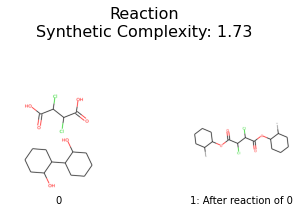

In [176]:
importlib.reload(ru)
i=0
filtered_rs_ls_srt_no_dup[i].DrawStep()

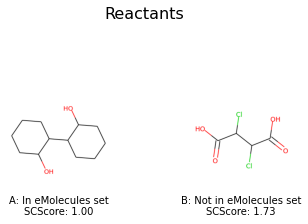

In [177]:
i=0
filtered_rs_ls_srt_no_dup[i].DrawCatalog()

In [14]:
filtered_rs_ls_srt_no_dup[0].reactant_frag_smiles

['CC1(C)C(OC(=O)O)C(C)(C)C1OC(=O)O', 'CC1(C)C(O)C(C)(C)C1O']

[1.         1.72892631]


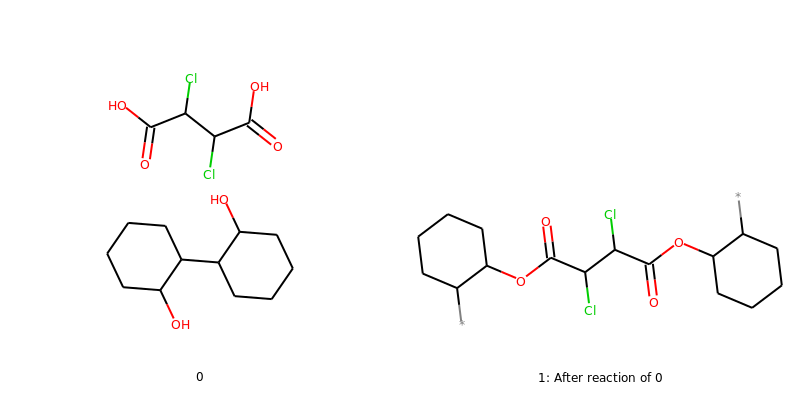

In [18]:
i=1
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawStep()

[1.         1.72892631]


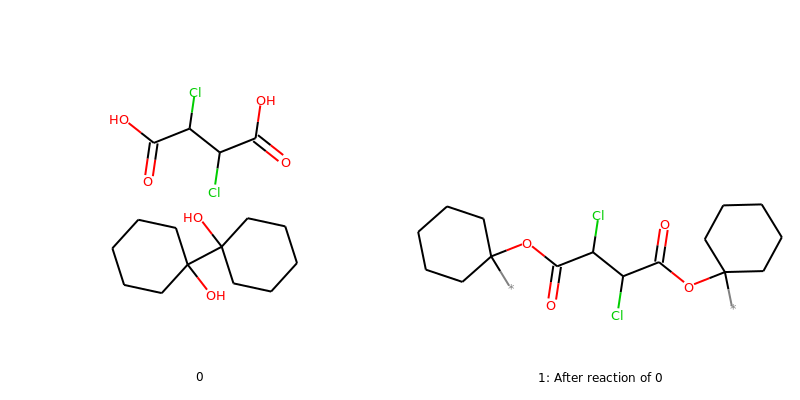

In [19]:
i=2
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawStep()

[1.8278232 1.       ]


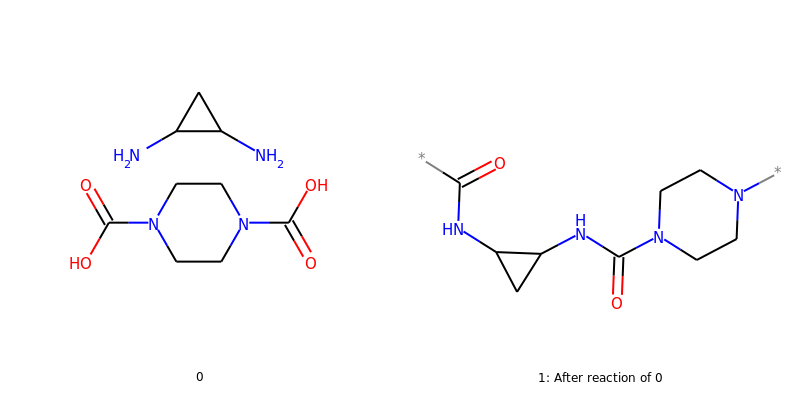

In [20]:
i=3
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawStep()

[1.85068461 1.        ]


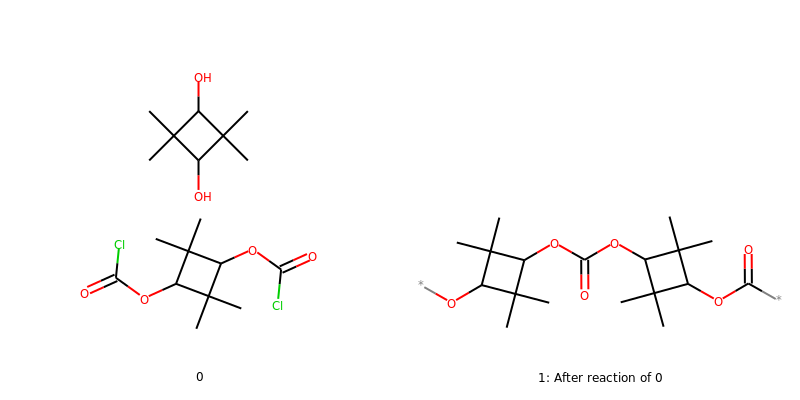

In [21]:
i=4
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawStep()

In [ ]:
filtered_rs_ls_srt_no_dup[i].product_smiles

[1.        1.9765495]


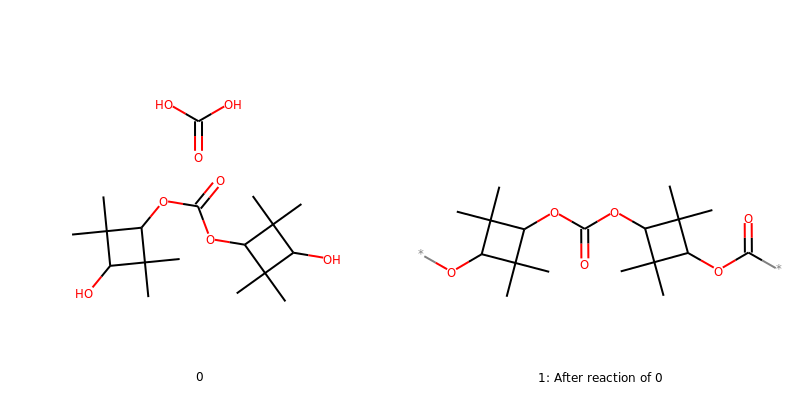

In [22]:
i=5
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawStep()

[2.05632623 1.        ]


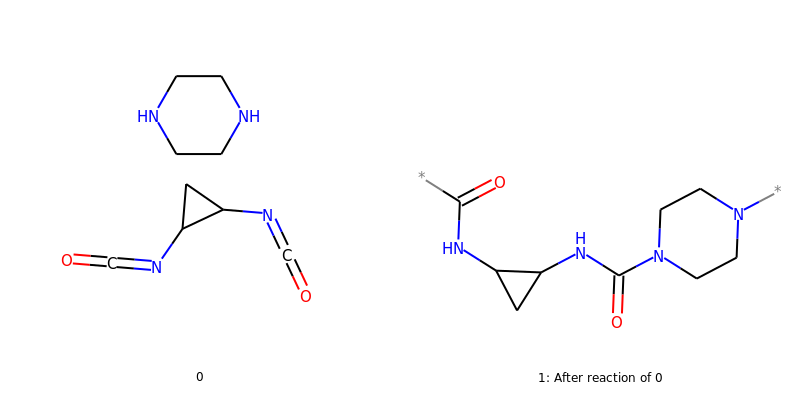

In [23]:
i=6
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawStep()

[1.       2.056503]


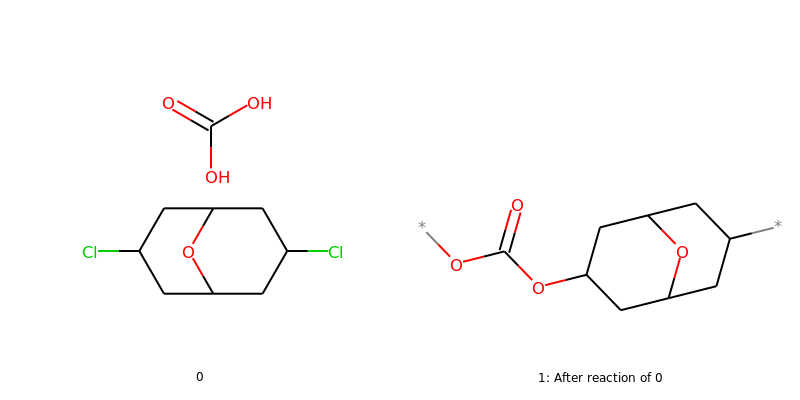

In [24]:
i=7
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawStep()

In [ ]:
filtered_rs_ls_srt_no_dup[i].reactant_frag_smiles

In [ ]:
i=8
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawCatalog()

In [ ]:
i=9
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawCatalog()

In [ ]:
filtered_rs_ls_srt_no_dup[i].reactant_frag_smiles

In [ ]:
i=10
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawCatalog()

In [ ]:
i=16
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawCatalog()

In [ ]:
filtered_rs_ls_srt_no_dup[i].DrawStep()

In [ ]:
filtered_rs_ls_srt_no_dup[i].product_smiles.replace('*','[*]')

In [ ]:
df_med[df_med['smiles']==filtered_rs_ls_srt_no_dup[i].product_smiles.replace('*','[*]')]

# Test lookup w/ frp on G2G-relaxed polymers

In [271]:
rxn_fn = retro.frp_depolymerize

In [264]:
importlib.reload(retro)
ReactionStepList = []
rxn_fn = retro.frp_depolymerize
for x in smiles_ls:
    mol = Chem.MolFromSmiles(x)
    monomers = rxn_fn(mol)
    if monomers != None:
        for monomer in monomers:
            rs = retro.ReactionStep(monomer,mol,rxn_fn)
            ReactionStepList.append(rs)

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz


In [265]:
len(ReactionStepList)

27

In [ ]:
with open('/data/rgur/retrosynthesis/molecule_lookup/mol_set.pkl','rb') as f:
    mol_set = pickle.load(f)

In [272]:
ReactionStepList = [retro.ReactionStep(x.reactant_mol,x.product_mol,rxn_fn) for x in ReactionStepList]
for x in ReactionStepList:
    x.SearchReactants(mol_set)
    x.SyntheticScore()

In [273]:
filtered_rs_ls_srt_no_dup = sorted(ReactionStepList,key=lambda x: np.mean(x.synthetic_scores),reverse=False)

[2.39605193]


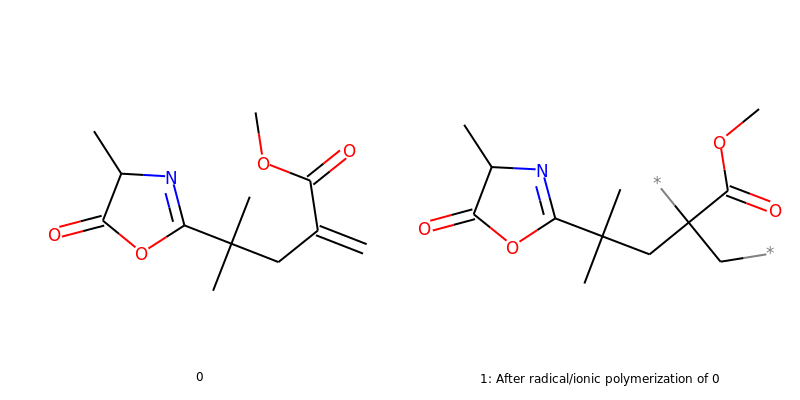

In [274]:
i=0
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawStep()

[2.41798566]


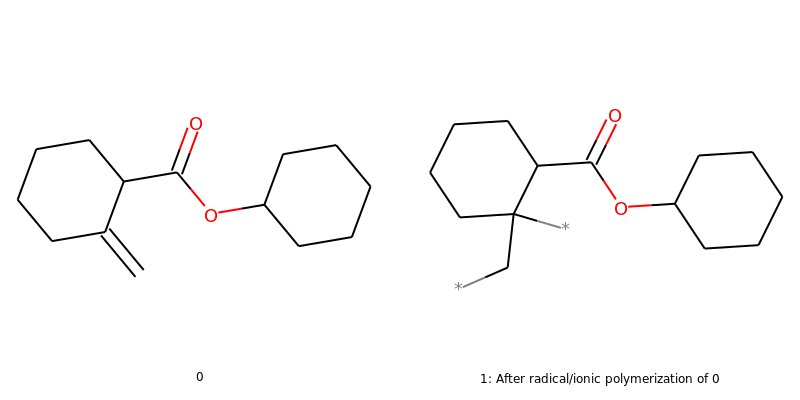

In [275]:
i=1
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawStep()

[2.70555583]


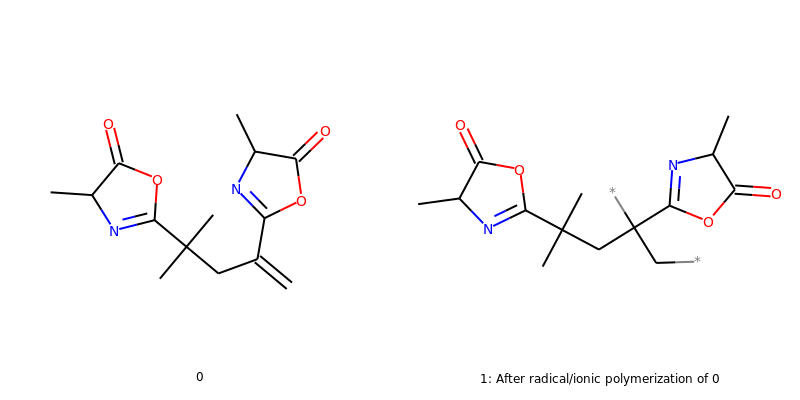

In [276]:
i=2
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawStep()

[2.82632686]


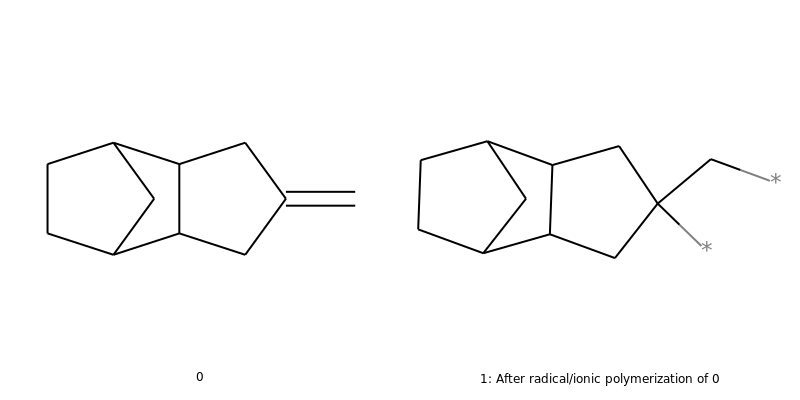

In [277]:
i=3
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawStep()

[2.91663104]


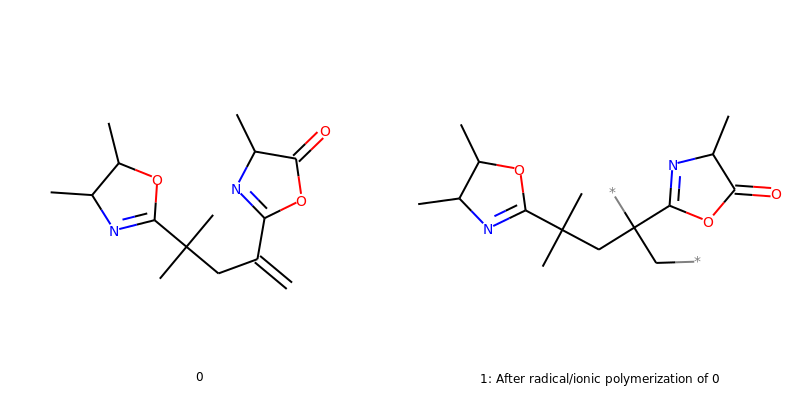

In [278]:
i=4
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawStep()

[2.98736516]


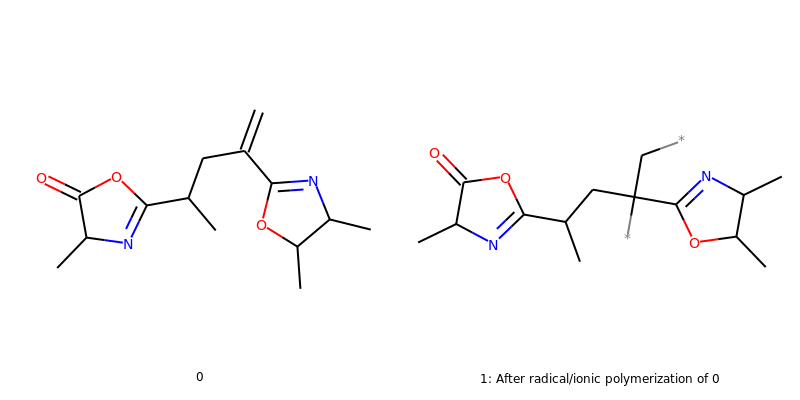

In [279]:
i=5
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawStep()

[2.99833462]


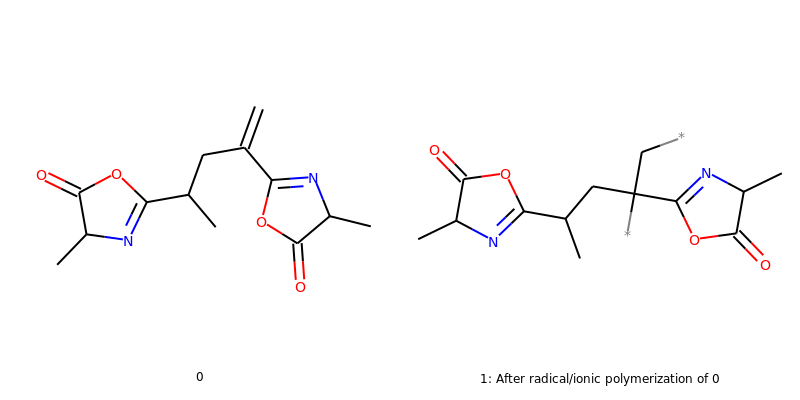

In [280]:
i=6
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawStep()

[3.51673723]


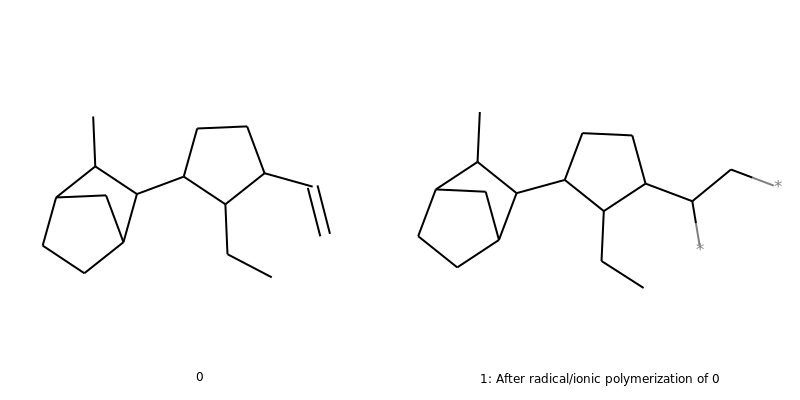

In [320]:
i=19
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawStep()

# Find spiro centers

In [ ]:
mol = Chem.MolFromSmiles('C1CC5(C1)CCC(C4CCC3(CC2CCC2CO3)C4)C5')
mol

In [ ]:
ru.mol_with_atom_index(mol)

In [ ]:
ri = mol.GetRingInfo()

In [ ]:
ri.AtomRings()

In [ ]:
ar_sets = [set(ring) for ring in ri.AtomRings()]
ar_sets

In [ ]:
n_spiro = 0
for i,ring in enumerate(ar_sets):
    for j,other_ring in enumerate(ar_sets):
        if i>j:
            if len(ring.intersection(other_ring)) == 1:
                n_spiro += 1

In [ ]:
n_spiro

In [ ]:
importlib.reload(ru)

In [ ]:
ru.n_spiro(mol) #should be 2

# Polyamide sg

In [ ]:
linkage = '*[NH]C(=O)*'

In [ ]:
Chem.MolFromSmarts(linkage)

In [ ]:
g1 = Chem.MolFromSmarts('C(=O)[OH]')
g1

In [ ]:
mol = Chem.MolFromSmiles('NCCC(=O)O')
ru.mol_with_atom_index(mol)

In [ ]:
mol.GetSubstructMatches(g1) 

In [ ]:
g2 = Chem.MolFromSmarts('[NH2]')
g2

In [ ]:
mol.GetSubstructMatches(g2)

In [ ]:
polymer = Chem.MolFromSmiles('[*]CCCCNC(=O)CCCCC(=O)N[*]')
polymer

In [ ]:
import itertools
lp = ru.LinearPol(polymer)
pm = lp.PeriodicMol()
if pm is None: #periodization failed
    print('None')
    #return None
if pm.HasSubstructMatch(g1) or pm.HasSubstructMatch(g2): #chain should not have same functional groups we want to react
    print('None')
    #return None
matches=pm.GetSubstructMatches(Chem.MolFromSmarts(linkage))
match_pairs = list(itertools.combinations(matches, 2))
new_mols = []

In [ ]:
ru.mol_with_atom_index(pm)

In [ ]:
match_pairs

In [ ]:
match_pair = match_pairs[0]
match_pair

In [ ]:
linkage

In [ ]:
a_ir1,a_in,a_ic,a_io,a_ir2 = match_pair[0]
b_ir1,b_in,b_ic,b_io,b_ir2 = match_pair[1]

In [ ]:
em = Chem.EditableMol(pm)
em.RemoveBond(a_ic,a_in)
em.RemoveBond(b_ic,b_in)
o1 = em.AddAtom(Chem.AtomFromSmiles('O'))
o2 = em.AddAtom(Chem.AtomFromSmiles('O'))
em.AddBond(o1,a_ic,Chem.BondType.SINGLE)
em.AddBond(o2,b_ic,Chem.BondType.SINGLE)
new_mol=em.GetMol()
Chem.SanitizeMol(new_mol)
new_mol

# Test polyamide sg

In [ ]:
importlib.reload(retro)

In [ ]:
linkage

In [ ]:
retro.sg_depolymerize(polymer,Chem.MolFromSmarts(linkage),retro.sg_rxns[linkage][0])[0]

# sg polyurea

In [ ]:
linkage_smarts = '*[NH]C(=O)[NH]*'
polymer_linkage = Chem.MolFromSmarts(linkage_smarts)
polymer_linkage

In [ ]:
mol = Chem.MolFromSmiles('*NCNC(=O)Nc1cccc(NC(*)=O)c1')
mol

In [ ]:
g1,g2 = Chem.MolFromSmarts('[NH2]'),Chem.MolFromSmarts('N=C=O')
g2

In [ ]:
import itertools
if type(mol) == str:
    mol = Chem.MolFromSmiles(mol)

lp = ru.LinearPol(mol)
pm = lp.PeriodicMol()
if pm is None: #periodization failed
    print(None)
    #return None
if pm.HasSubstructMatch(g1) or pm.HasSubstructMatch(g2): #chain should not have same functional groups we want to react
    print(None)
    #return None
matches=pm.GetSubstructMatches(polymer_linkage)
match_pairs = list(itertools.combinations(matches, 2))
new_mols = []
match_pairs

In [ ]:
ru.mol_with_atom_index(pm)

In [ ]:
match_pair = match_pairs[0]
match_pair

In [ ]:
linkage_smarts

In [ ]:
a_ir1,a_inh,a_ic,a_io,a_in,a_ir = match_pair[0]
b_ir1,b_inh,b_ic,b_io,b_in,b_ir = match_pair[1]

In [ ]:
em = Chem.EditableMol(pm)
em.RemoveBond(a_inh,a_ic)
em.RemoveBond(b_inh,b_ic)
#switch bond
em.RemoveBond(a_in,a_ic)
em.AddBond(a_in,a_ic,Chem.BondType.DOUBLE)
#switch bond
em.RemoveBond(b_in,b_ic)
em.AddBond(b_in,b_ic,Chem.BondType.DOUBLE)
new_mol = em.GetMol()
Chem.SanitizeMol(new_mol)
new_mol

In [ ]:
em = Chem.EditableMol(pm)
em.RemoveBond(a_in,a_ic)
em.RemoveBond(b_in,b_ic)
#switch bond
em.RemoveBond(a_inh,a_ic)
em.AddBond(a_inh,a_ic,Chem.BondType.DOUBLE)
#switch bond
em.RemoveBond(b_inh,b_ic)
em.AddBond(b_inh,b_ic,Chem.BondType.DOUBLE)
new_mol = em.GetMol()
Chem.SanitizeMol(new_mol)
new_mol

# Test polyurea sg depolymerize on vanilla case

In [ ]:
linkage_smarts = '*[NH]C(=O)[NH]*'
polymer_linkage = Chem.MolFromSmarts(linkage_smarts)
mol = Chem.MolFromSmiles('*NCNC(=O)Nc1cccc(NC(*)=O)c1')
importlib.reload(retro)
out=retro.sg_depolymerize(mol,polymer_linkage,retro.sg_rxns[linkage_smarts][0])

In [ ]:
out[0]

In [ ]:
out[1]

# Make polyurea sg depolymerize on hard case

In [ ]:
mol = Chem.MolFromSmiles('[*]C(=O)NC1CC1NC(=O)N1CCN([*])CC1')
mol

In [ ]:
linkage_smarts = '[NH]C(=O)N'
polymer_linkage = Chem.MolFromSmarts(linkage_smarts)
polymer_linkage

In [ ]:
g1,g2 = Chem.MolFromSmarts('[NH]'),Chem.MolFromSmarts('N=C=O')

In [ ]:
import itertools
if type(mol) == str:
    mol = Chem.MolFromSmiles(mol)

lp = ru.LinearPol(mol)
pm = lp.PeriodicMol()
if pm is None: #periodization failed
    print(None)
    #return None
# if pm.HasSubstructMatch(g1) or pm.HasSubstructMatch(g2): #chain should not have same functional groups we want to react
#     print('None2')
    #return None
matches=pm.GetSubstructMatches(polymer_linkage)
match_pairs = list(itertools.combinations(matches, 2))
new_mols = []
match_pairs

In [ ]:
match_pair = match_pairs[0]
linkage_smarts

In [ ]:
a_inh,a_ic,a_io,a_in = match_pair[0]
b_inh,b_ic,b_io,b_in = match_pair[1]
ru.mol_with_atom_index(pm)

In [ ]:
### make the first monomer set ###
em = Chem.EditableMol(pm)
em.RemoveBond(a_inh,a_ic)
em.RemoveBond(b_inh,b_ic)
#switch bond
em.RemoveBond(a_in,a_ic)
em.AddBond(a_in,a_ic,Chem.BondType.DOUBLE)
#switch bond
em.RemoveBond(b_in,b_ic)
em.AddBond(b_in,b_ic,Chem.BondType.DOUBLE)

new_mol1=em.GetMol()
try:
    Chem.SanitizeMol(new_mol1)
except:
    pass

### make the second monomer set ###
em = Chem.EditableMol(pm)
em.RemoveBond(a_in,a_ic)
em.RemoveBond(b_in,b_ic)
#switch bond
em.RemoveBond(a_inh,a_ic)
em.AddBond(a_inh,a_ic,Chem.BondType.DOUBLE)
#switch bond
em.RemoveBond(b_inh,b_ic)
em.AddBond(b_inh,b_ic,Chem.BondType.DOUBLE)
new_mol2 = em.GetMol()
try:
    Chem.SanitizeMol(new_mol2) 
except:
    pass  

In [ ]:
new_mol2

In [ ]:
### make the first monomer set ###
em = Chem.EditableMol(pm)
em.RemoveBond(a_inh,a_ic)
em.RemoveBond(b_inh,b_ic)
em.GetMol()

In [ ]:
### make the second monomer set ###
em = Chem.EditableMol(pm)
em.RemoveBond(a_in,a_ic)
em.RemoveBond(b_in,b_ic)
#switch bond
em.RemoveBond(a_inh,a_ic)
em.AddBond(a_inh,a_ic,Chem.BondType.DOUBLE)
#switch bond
em.RemoveBond(b_inh,b_ic)
em.AddBond(b_inh,b_ic,Chem.BondType.DOUBLE)
new_mol2 = em.GetMol()
try:
    Chem.SanitizeMol(new_mol2) 
except:
    pass  

# Test polyurea on hard case

In [ ]:
mol = Chem.MolFromSmiles('[*]C(=O)NC1CC1NC(=O)N1CCN([*])CC1')

In [ ]:
linkage_smarts = '[NH]C(=O)N'
polymer_linkage = Chem.MolFromSmarts(linkage_smarts)

In [ ]:
importlib.reload(retro)
out=retro.sg_depolymerize(mol,polymer_linkage,retro.sg_rxns[linkage_smarts][0])
out

In [ ]:
out[0]

# Make sg of C=O aromatic polyether

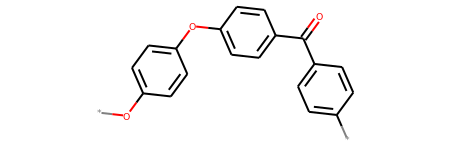

In [195]:
mol = Chem.MolFromSmiles('[*]Oc1ccc(Oc2ccc(C(=O)c3ccc([*])cc3)cc2)cc1')
mol

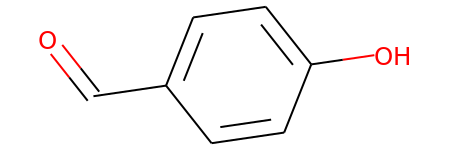

In [235]:
linkage_smiles= 'O=Cc1ccc(O)cc1'
polymer_linkage=Chem.MolFromSmiles(linkage_smiles)
polymer_linkage

In [227]:
mol.HasSubstructMatch(polymer_linkage)

True

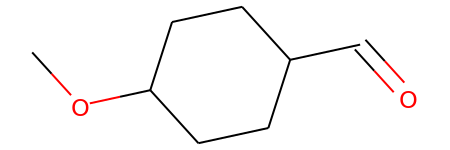

In [228]:
mol2 = Chem.MolFromSmiles('COC1CCC(C=O)CC1')
mol2

In [229]:
mol2.HasSubstructMatch(polymer_linkage) #should be false

False

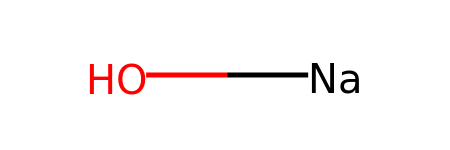

In [240]:
g1 = Chem.MolFromSmiles('Cl')
g2 = Chem.MolFromSmiles('O[Na]')
g2

In [241]:
b=g2.GetBonds()[0]

In [242]:
b.GetBondType()

rdkit.Chem.rdchem.BondType.SINGLE

In [231]:
if type(mol) == str:
    mol = Chem.MolFromSmiles(mol)

lp = ru.LinearPol(mol)
pm = lp.PeriodicMol()
if pm is None: #periodization failed
    print('None')
    #return None
if pm.HasSubstructMatch(g1) or pm.HasSubstructMatch(g2): #chain should not have same functional groups we want to react
    if edit_function != nh_nco_edit: #but there are exceptions
        print('None')
polymer_linkage.UpdatePropertyCache()
Chem.SanitizeMol(polymer_linkage)
matches=pm.GetSubstructMatches(polymer_linkage)
match_pairs = list(itertools.combinations(matches, 2))
new_mols = []

In [232]:
match_pairs

[((11, 10, 9, 8, 7, 6, 5, 19, 18), (11, 10, 12, 13, 14, 15, 0, 16, 17))]

In [237]:
match_pair = match_pairs[0]

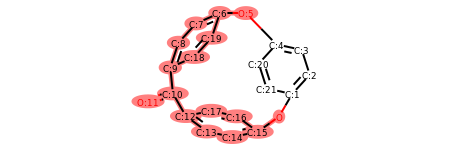

In [233]:
ru.mol_with_atom_index(pm)

In [236]:
linkage_smiles

'O=Cc1ccc(O)cc1'

In [238]:
_,_,_,_,_,ai_c,ai_o,_,_ = match_pair[0]
_,_,_,_,_,bi_c,i_o,_,_ = match_pair[1]

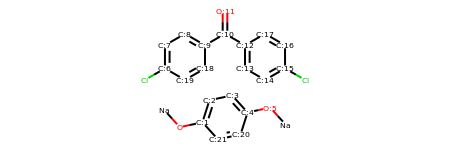

In [244]:
em = Chem.EditableMol(pm)
em.RemoveBond(ai_c,ai_o)
em.RemoveBond(bi_c,bi_o)
#add atoms
cl1=em.AddAtom(Chem.AtomFromSmiles('Cl'))
cl2=em.AddAtom(Chem.AtomFromSmiles('Cl'))
na1=em.AddAtom(Chem.AtomFromSmiles('[Na]'))
na2=em.AddAtom(Chem.AtomFromSmiles('[Na]'))
#add bonds
em.AddBond(ai_o,na1,Chem.BondType.SINGLE)
em.AddBond(bi_o,na2,Chem.BondType.SINGLE)
em.AddBond(ai_c,cl1,Chem.BondType.SINGLE)
em.AddBond(bi_c,cl2,Chem.BondType.SINGLE)
#get mol
new_mol=em.GetMol()
Chem.SanitizeMol(new_mol)
new_mol
#frag_ids = Chem.GetMolFrags(new_mol)

# if len(frag_ids) == 2:
#     frag_mols = Chem.GetMolFrags(new_mol, asMols=True)
#     if frag_mols[0].HasSubstructMatch(Chem.MolFromSmarts('[NH2]')):
#         nh2_ind = 0
#         cooh_ind = 1
#     else:
#         nh2_ind = 1
#         cooh_ind = 0
#     nh2_mol = frag_mols[nh2_ind]
#     cooh_mol = frag_mols[cooh_ind]
#     return [(new_mol, nh2_mol, cooh_mol)]
# else:
#     return []

# Test aromatic C=O polyether

In [249]:
importlib.reload(retro)
linkage_smiles= 'O=Cc1ccc(O)cc1'
polymer_linkage=Chem.MolFromSmiles(linkage_smiles)
polymer_linkage
mol = Chem.MolFromSmiles('[*]Oc1ccc(Oc2ccc(C(=O)c3ccc([*])cc3)cc2)cc1')
out=retro.sg_depolymerize(mol,polymer_linkage,retro.sg_rxns[linkage_smiles][0])

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz


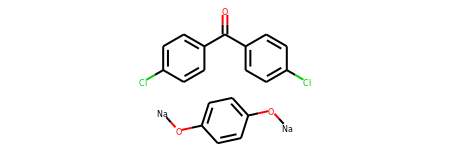

In [250]:
out[0]

# Search for strange linkages

In [384]:
linkage_smiles = '*c1ccc(*)cc1'
polymer_linkage=Chem.MolFromSmiles(linkage_smiles)

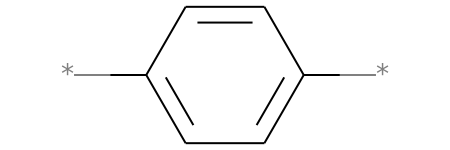

In [385]:
polymer_linkage

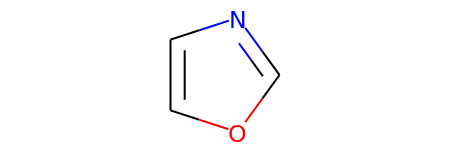

In [83]:
polymer_linkage

In [136]:
out = []
for x in smiles_ls:
    mol = Chem.MolFromSmiles(x)
    try:
        a=retro.depolymerize(mol,polymer_linkage,retro.sg_rxns['C1=NCCO1'][0])
        if a != None:
            out.append(x)
    except:
        pass


In [137]:
len(out)

0

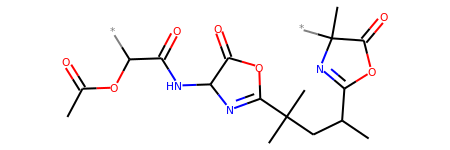

In [375]:
Chem.MolFromSmiles(out[94])

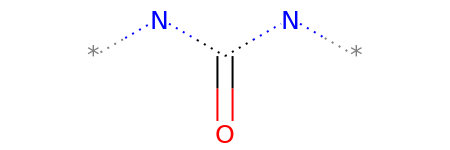

In [377]:
linkage_

# Make sg for C1=NccO1

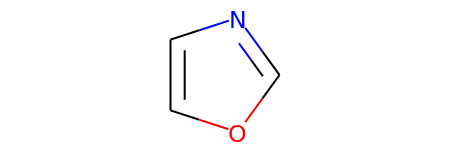

In [88]:
linkage_smiles = 'C1=NccO1'
polymer_linkage=Chem.MolFromSmiles(linkage_smiles)
polymer_linkage

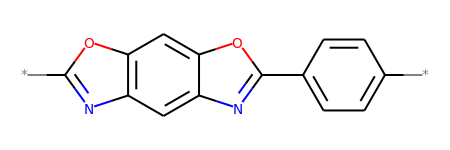

In [89]:
mol = Chem.MolFromSmiles('*c4ccc(c3nc2cc1nc(*)oc1cc2o3)cc4')
mol

In [57]:
mol.HasSubstructMatch(polymer_linkage)

True

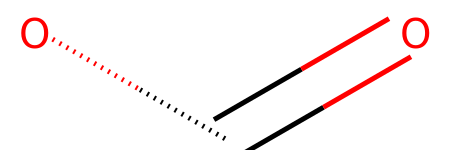

In [58]:
g1 = [Chem.MolFromSmarts('C(=O)[OH]')]
g1[0]

In [59]:
g2 = [Chem.MolFromSmarts('[NH2]'),Chem.MolFromSmarts('[OH]')]

In [60]:
import itertools
if type(mol) == str:
    mol = Chem.MolFromSmiles(mol)

lp = ru.LinearPol(mol)
pm = lp.PeriodicMol()
if pm is None: #periodization failed
    print('None')
    #return None
    try: #sometimes g1 and g2 are given as lists. If so they will fail below.
        if pm.HasSubstructMatch(g1) or pm.HasSubstructMatch(g2): #chain should not have same functional groups we want to react
            if edit_function != nh_nco_edit: #but there are exceptions
                print('None2')
                #return None
    except:
        if any([pm.HasSubstructMatch(x) for x in g1] + [pm.HasSubstructMatch(x) for x in g2]): #chain should not have same functional groups we want to react
            if edit_function != nh_nco_edit: #but there are exceptions
                print('None3')
                #return None      
matches=pm.GetSubstructMatches(polymer_linkage)
match_pairs = list(itertools.combinations(matches, 2))
new_mols = []

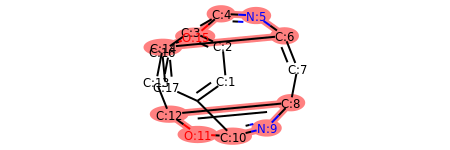

In [71]:
ru.mol_with_atom_index(pm)

In [63]:
match_pair = match_pairs[0]
linkage_smiles

'C1=NccO1'

In [64]:
a_ic,a_in,_,_,a_io = match_pair[0]
b_ic,b_in,_,_,b_io = match_pair[1]

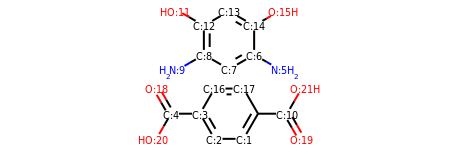

In [80]:
em = Chem.EditableMol(pm)
em.RemoveBond(a_ic,a_io)
em.RemoveBond(b_ic,b_io)
em.RemoveBond(a_ic,a_in)
em.RemoveBond(b_ic,b_in)

#remove and replace aromatic bonds
em.ReplaceAtom(a_ic,Chem.AtomFromSmiles('C'))
em.ReplaceAtom(b_ic,Chem.AtomFromSmiles('C'))

em.ReplaceAtom(a_in,Chem.AtomFromSmiles('N'))
em.ReplaceAtom(b_in,Chem.AtomFromSmiles('N'))

em.ReplaceAtom(a_io,Chem.AtomFromSmiles('O'))
em.ReplaceAtom(b_io,Chem.AtomFromSmiles('O'))

#add =O(OH) 
dblO1 = em.AddAtom(Chem.AtomFromSmiles('O'))
dblO2 = em.AddAtom(Chem.AtomFromSmiles('O'))
o1 = em.AddAtom(Chem.AtomFromSmiles('O'))
o2 = em.AddAtom(Chem.AtomFromSmiles('O'))
em.AddBond(a_ic,dblO1,Chem.BondType.DOUBLE)
em.AddBond(b_ic,dblO2,Chem.BondType.DOUBLE)
em.AddBond(a_ic,o1,Chem.BondType.SINGLE)
em.AddBond(b_ic,o2,Chem.BondType.SINGLE)

new_mol=em.GetMol()
Chem.SanitizeMol(new_mol)
ru.mol_with_atom_index(new_mol)

# Test sg for C1=NccO1

In [91]:
importlib.reload(retro)
out=retro.sg_depolymerize(mol,polymer_linkage,retro.sg_rxns[linkage_smiles][0])

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz


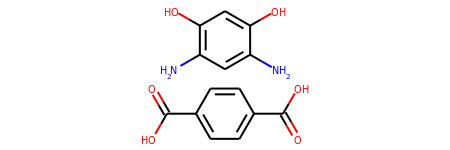

In [92]:
out[0]

# Test C1=NCCO1

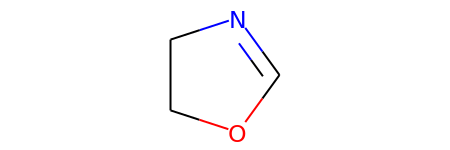

In [134]:
linkage_smiles = 'C1=NCCO1'
polymer_linkage=Chem.MolFromSmiles(linkage_smiles)
polymer_linkage

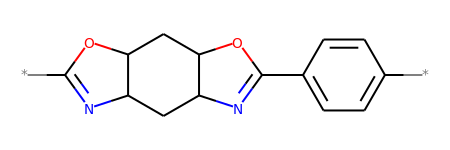

In [125]:
mol = Chem.MolFromSmiles('*c4ccc(C3=NC2CC1N=C(*)OC1CC2O3)cc4')
mol

In [120]:
if type(mol) == str:
    mol = Chem.MolFromSmiles(mol)

lp = ru.LinearPol(mol)
pm = lp.PeriodicMol()

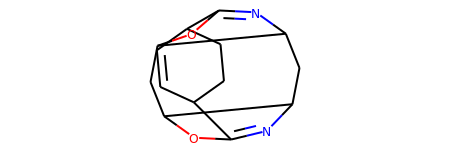

In [121]:
pm

In [122]:
pm.GetSubstructMatches(polymer_linkage)

((4, 5, 6, 14, 15), (10, 9, 8, 12, 11))

In [123]:
importlib.reload(retro)
out=retro.sg_depolymerize(mol,polymer_linkage,retro.sg_rxns[linkage_smiles][0])
out

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz
[((4, 5, 6, 14, 15), (10, 9, 8, 12, 11))]


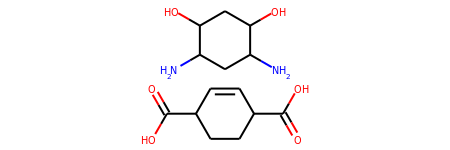

In [124]:
out[0]

# Test ring-opening: lactam

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz


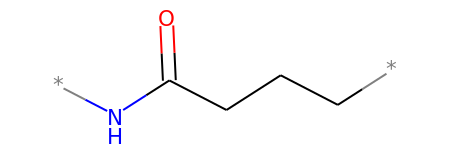

In [5]:
importlib.reload(retro)
mol = Chem.MolFromSmiles('*CCCC(=O)N*')
mol


In [6]:
retro.ro_depolymerize2(mol)

here1


# Test drawing features of rdkit

In [2]:
mol1 = Chem.MolFromSmiles('CC')
mol2 = Chem.MolFromSmiles('C1OC1')

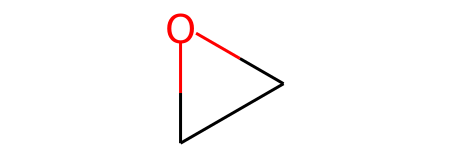

In [3]:
mol2

In [44]:
b=Chem.Draw.MolToImage(mol1)
c=Chem.Draw.MolToImage(mol2)

In [26]:
a=Chem.Draw.MolsToGridImage([mol1,mol2],molsPerRow=2,subImgSize=(400, 400))

In [12]:
import matplotlib.pyplot as plt

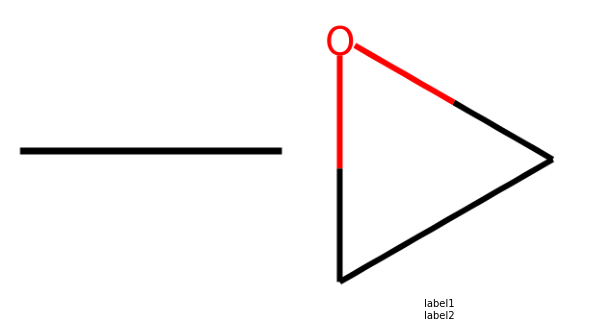

In [50]:
fig = plt.figure(figsize=(8,8))
ax0=fig.add_axes([0,0,.5,1])
ax1=fig.add_axes([.5,0,.5,1])
all_ax = [ax0,ax1]
ax0.imshow(b)
ax1.imshow(c)
ax1.set_xlabel('label1\nlabel2')
#clean each axis
for ax in all_ax:
    for s in ax.spines.keys():
        ax.spines[s].set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])    
fig.show()

# Test my implementation of ru.MolsToGridImage

[0.  0.5 1. ]
[0. 1.]


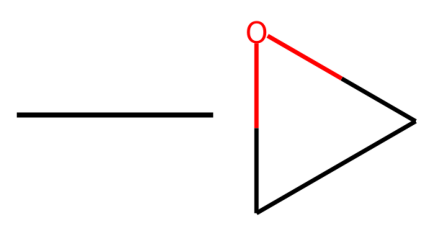

In [62]:
importlib.reload(ru)
ru.MolsToGridImage([mol1,mol2])

m1
m1
m2
m2
m3
m3
m4
m4
m5
m5


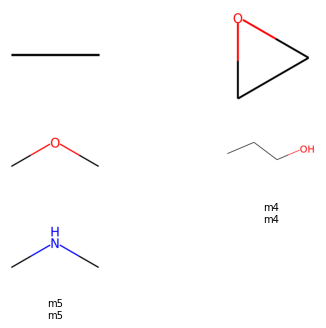

In [80]:
importlib.reload(ru)
mol3 = Chem.MolFromSmiles('COC')
mol4 = Chem.MolFromSmiles('CCCO')
mol5 = Chem.MolFromSmiles('CNC')
labels = ['m1\nm1','m2\nm2','m3\nm3','m4\nm4','m5\nm5']
ru.MolsToGridImage([mol1,mol2,mol3,mol4,mol5],labels=labels)

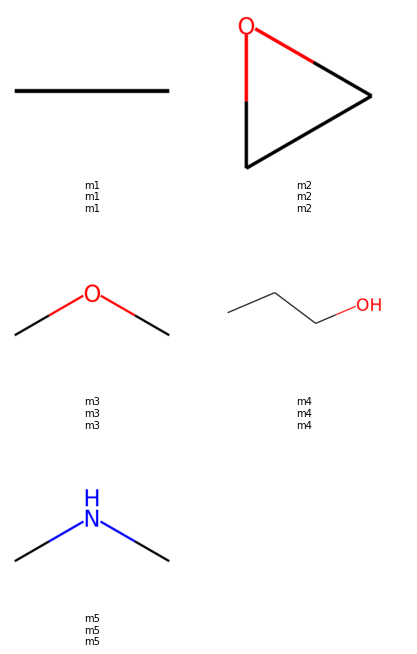

In [99]:
importlib.reload(ru)
mol3 = Chem.MolFromSmiles('COC')
mol4 = Chem.MolFromSmiles('CCCO')
mol5 = Chem.MolFromSmiles('CNC')
labels = ['m1\nm1\nm1','m2\nm2\nm2','m3\nm3\nm3','m4\nm4\nm4','m5\nm5\nm5']
ru.MolsToGridImage([mol1,mol2,mol3,mol4,mol5],labels=labels,ImgSize=(6,9))

In [51]:
import numpy as np

In [53]:
int(np.ceil(4.5))

5

In [56]:
np.linspace(0,1,3)[:-1]

array([0. , 0.5])

In [57]:
np.linspace(0,1,4)[:-1]

array([0.        , 0.33333333, 0.66666667])

(2, 3)

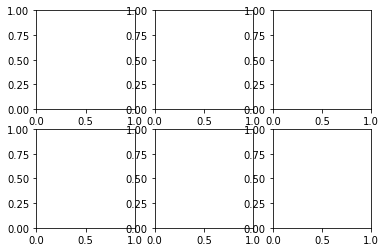

In [82]:
plt.subplots(nrows=2, ncols=3)[1].shape

In [159]:
np.product([3,2,1])

6